In [11]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [12]:
# load predicted values from the previous 6-fold cross-validation as df
m2v_ffnn_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/esol_word2vec_ffnn_ds6_fold1_results.csv')
m2v_ffnn_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/esol_word2vec_ffnn_ds5_fold2_results.csv')
m2v_ffnn_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/esol_word2vec_ffnn_ds4_fold3_results.csv')
m2v_ffnn_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/esol_word2vec_ffnn_ds3_fold4_results.csv')
m2v_ffnn_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/esol_word2vec_ffnn_ds2_fold5_results.csv')
m2v_ffnn_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/esol_word2vec_ffnn_ds1_fold6_results.csv')
# concat the data, rename columns (actual=experimentally determined value)
m2v_ffnn = pd.concat((m2v_ffnn_1, m2v_ffnn_2, m2v_ffnn_3, m2v_ffnn_4, m2v_ffnn_5, m2v_ffnn_6), axis=0)
m2v_ffnn = m2v_ffnn.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [13]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_ffnn['actual'], m2v_ffnn['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_ffnn['actual'], m2v_ffnn['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_ffnn['actual'], m2v_ffnn['predict']))

0.7392222195282917
0.9647887947383688
0.7880400721371985


In [14]:
len(m2v_ffnn)

1144

In [15]:
# calculate the residual value for each molecule
m2v_ffnn['residual']= m2v_ffnn['predict'] - m2v_ffnn['actual']

In [16]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_ffnn['residual']**2).sum()/(len(m2v_ffnn)-2))
sdr

0.9656332489873313

In [17]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
m2v_ffnn['std_residual'] = m2v_ffnn['residual']/sdr
m2v_ffnn['std_residual']

0     -2.821963
1     -0.699316
2      1.339142
3      0.563991
4     -0.701828
         ...   
139    2.212578
140    0.603106
141   -0.034491
142   -0.991797
143    1.140661
Name: std_residual, Length: 1144, dtype: float64

In [18]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_ffnn_outliers = m2v_ffnn.loc[abs(m2v_ffnn['std_residual']) > n]
m2v_ffnn_outliers

,Unnamed: 0,number,actual,predict,SMILES,residual,std_residual
74,74,399,0.715,-3.031250,Cc1cc(=O)n(c2ccccc2)n1C,-3.746250,-3.879578
137,137,671,-8.600,-5.232530,CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3,3.367470,3.487318
154,154,583,-4.950,-2.041854,CC=C(C(=CC)c1ccc(O)cc1)c2ccc(O)cc2,2.908146,3.011646
179,179,775,-4.640,-1.538539,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,3.101461,3.211841
74,74,566,-6.960,-3.474451,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,3.485549,3.609599
102,102,559,-8.402,-5.388254,CC1(C)C(C=C(Br)Br)C1C(=O)OC(C#N)c2cccc(Oc3cccc...,3.013746,3.121005
84,84,116,-11.600,-7.441103,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,4.158897,4.306912
97,97,968,-4.160,-1.161199,CN2C(=C(O)c1ccccc1S2(=O)=O)C(=O)Nc3ccccn3,2.998801,3.105528


In [19]:
# Set the default text font size
plt.rc('font', size=22)

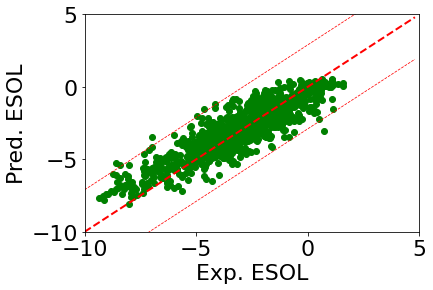

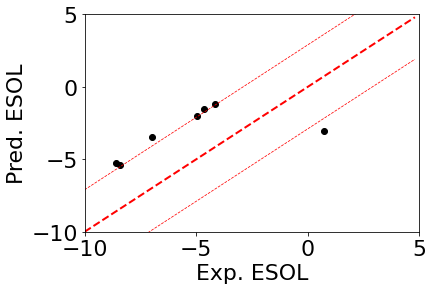

In [20]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn['actual'], y=m2v_ffnn['predict'], color='green')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_outliers['actual'], y=m2v_ffnn_outliers['predict'], color='black')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

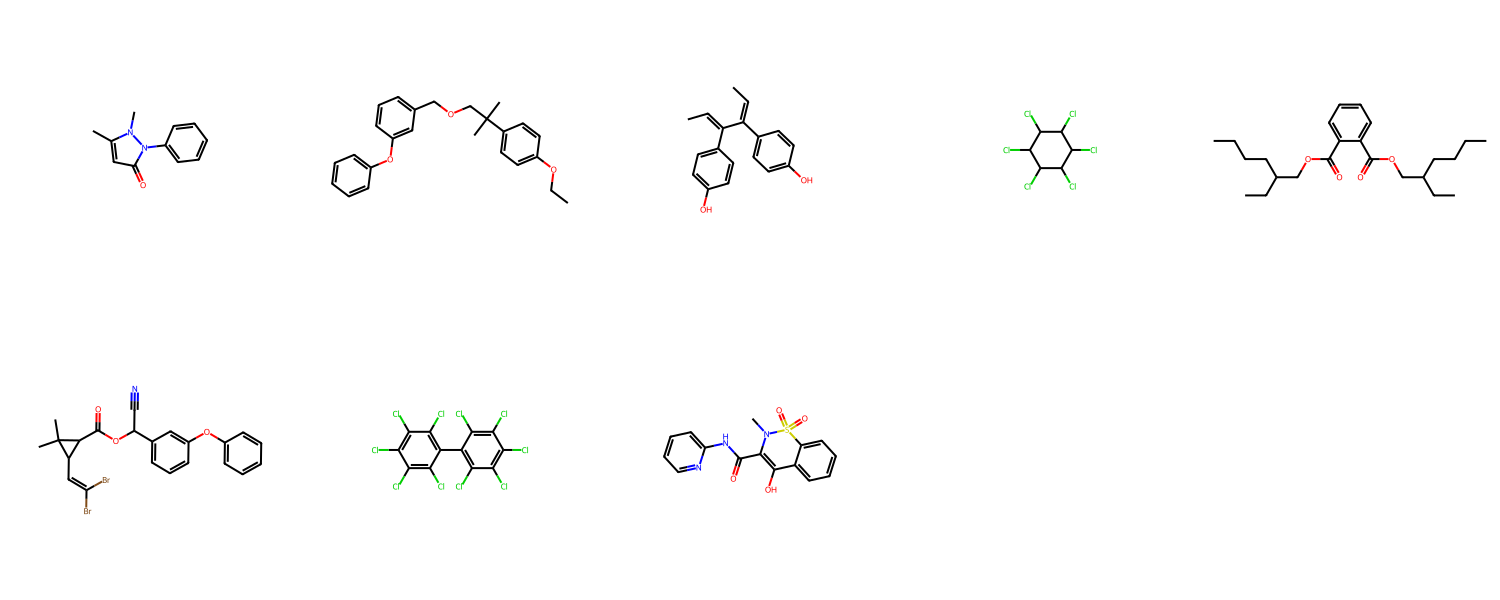

In [21]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in m2v_ffnn_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [22]:
m2v_ffnn_outliers.to_csv('m2v_ffnn_esol_outliers3.csv')

In [23]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_ffnn_outliers2 = m2v_ffnn.loc[abs(m2v_ffnn['std_residual']) > n]
m2v_ffnn_outliers2

,Unnamed: 0,number,actual,predict,SMILES,residual,std_residual
0,0,599,0.523,-2.201982,CCN(CC)C(=O)C(=CCOP(=O)(OC)OC)Cl,-2.724982,-2.821963
26,26,723,-5.230,-2.707208,Cc1c(C)c(C)c(C)c(C)c1C,2.522792,2.612578
68,68,1006,-7.110,-4.366984,c1ccc(cc1)c2ccc(cc2)c3ccccc3,2.743016,2.840640
74,74,399,0.715,-3.031250,Cc1cc(=O)n(c2ccccc2)n1C,-3.746250,-3.879578
113,113,714,-3.583,-1.254992,Nc2nc1[nH]cnc1c(=O)[nH]2,2.328008,2.410861
179,179,869,-3.220,-0.841316,O=C1NCCN1c2ncc(s2)N(=O)=O,2.378684,2.463341
194,194,540,-4.150,-1.481026,C1CCCCCCC1,2.668974,2.763962
6,6,1139,1.144,-1.546458,CNC(=O)C(C)SCCSP(=O)(OC)(OC),-2.690458,-2.786211
24,24,523,-5.839,-3.866577,CC(=O)CC(c1ccc(Cl)cc1)c2c(O)c3ccccc3oc2=O,1.972423,2.042622
57,57,595,-2.340,-0.396035,ICI,1.943965,2.013150


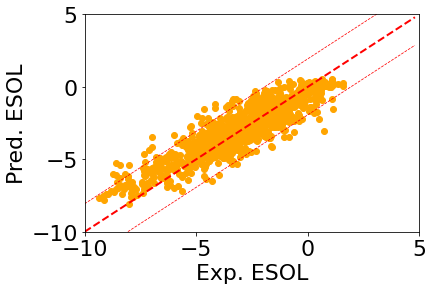

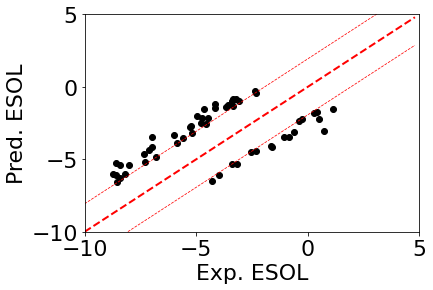

In [24]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement. 
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn['actual'], y=m2v_ffnn['predict'], color='orange')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_outliers2['actual'], y=m2v_ffnn_outliers2['predict'], color='black')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

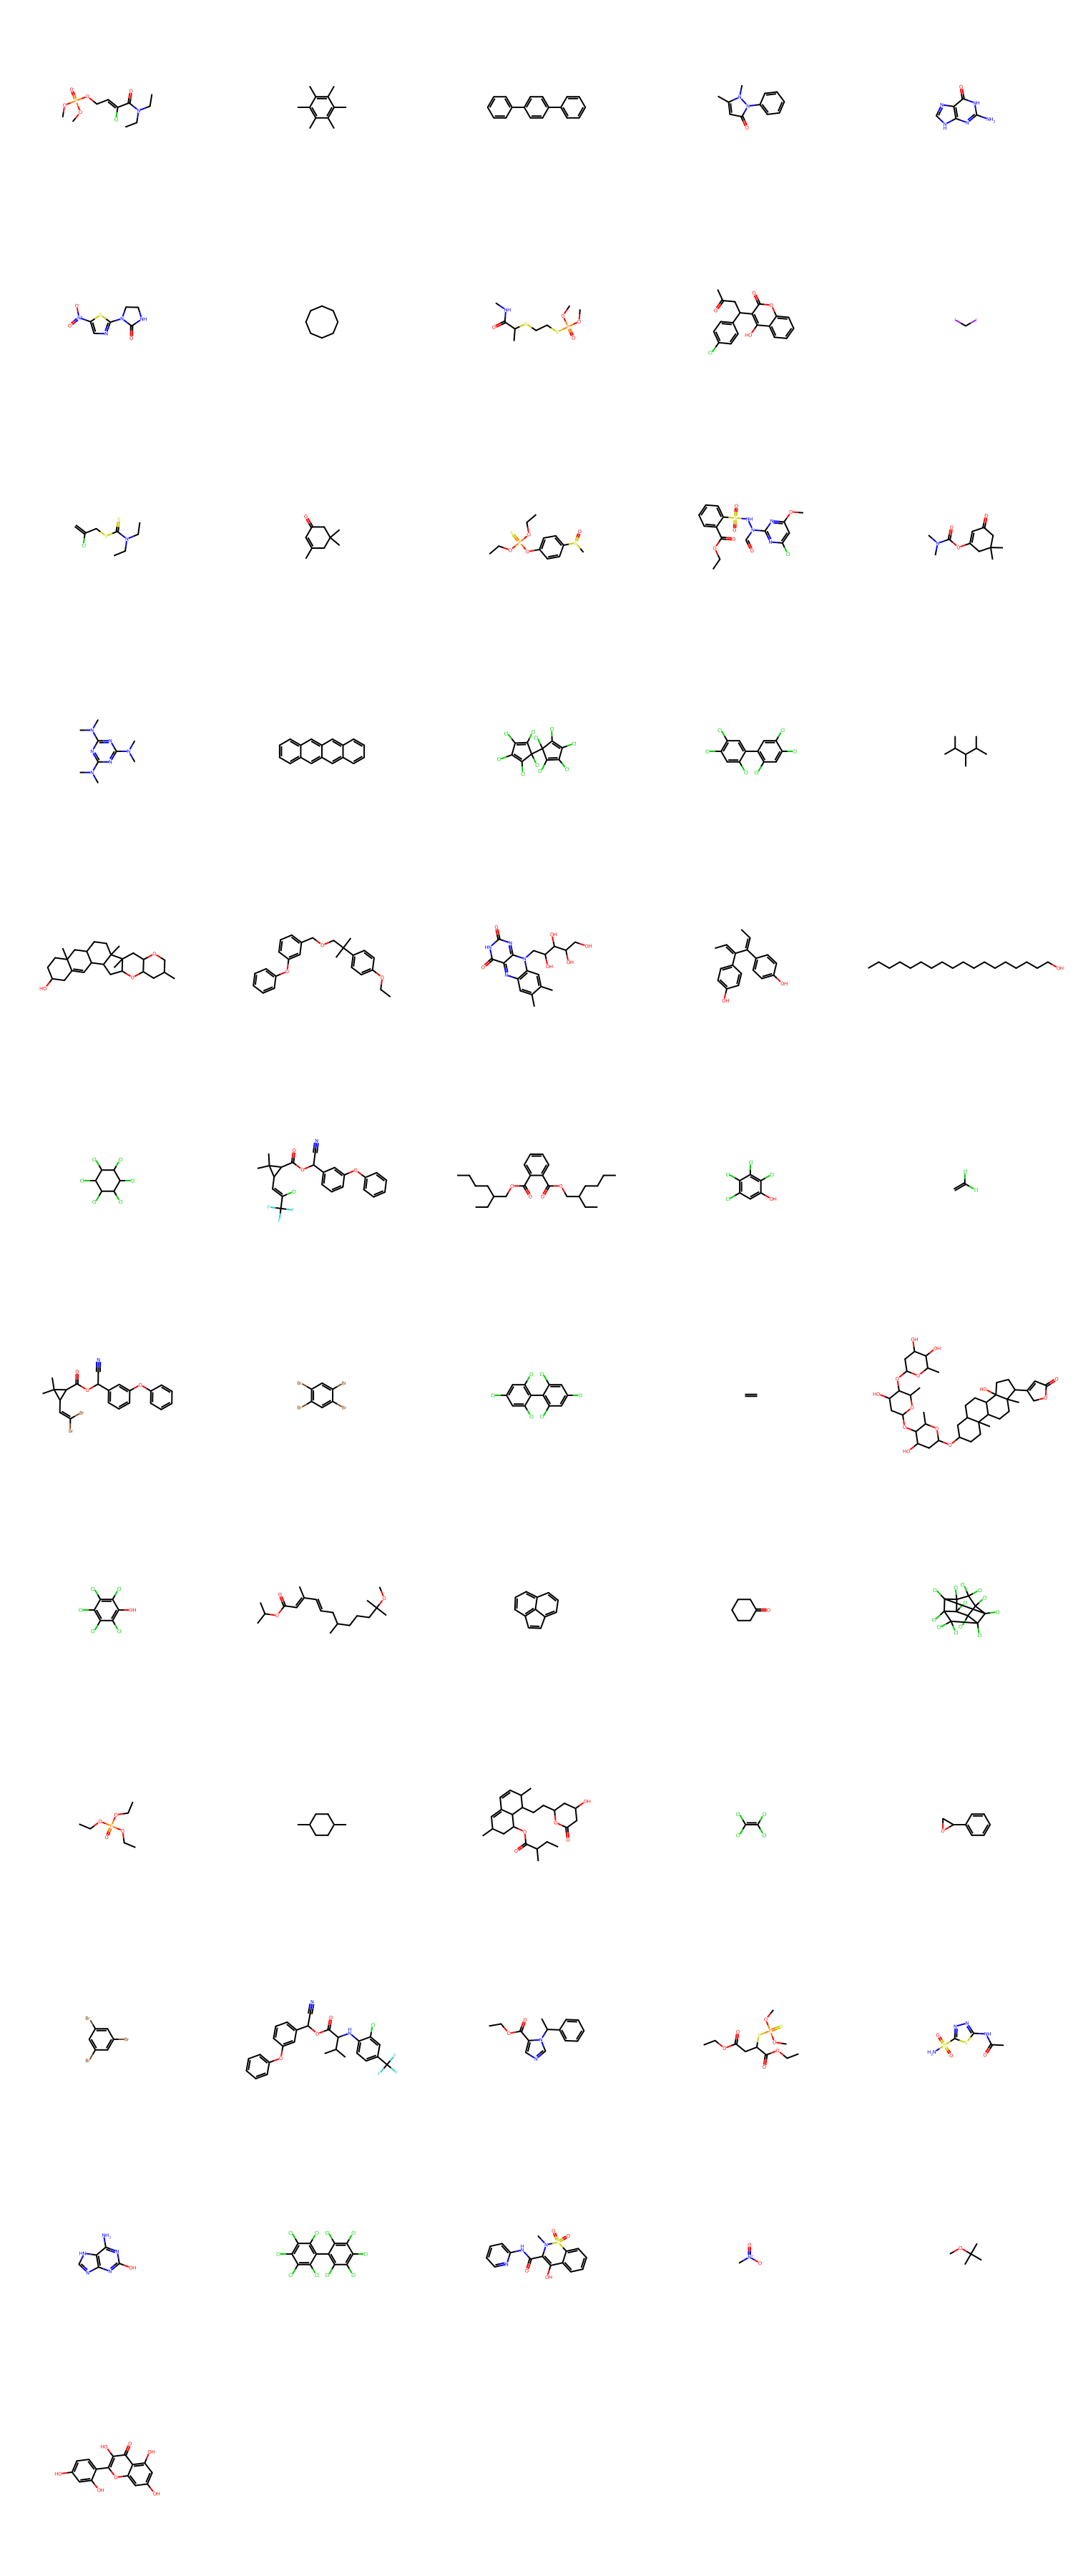

In [14]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in m2v_ffnn_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=200)

In [15]:
# save outliers (n=2) info to a csv file
m2v_ffnn_outliers2.to_csv('m2v_ffnn_esol_outliers2.csv')

In [17]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_ffnn_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

204.1519488730402
276.96710632953574


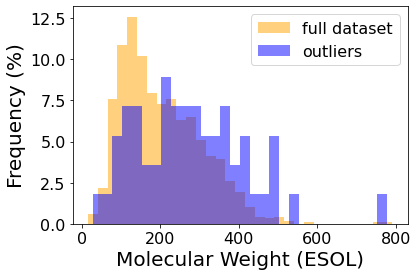

In [19]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (ESOL)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()